datebase

In [1]:
import numpy as np
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

log_dir = "board/model"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0)  # 设置TensorBoard回调
train_data = scipy.io.loadmat('data/train/train_32x32.mat')
test_data=scipy.io.loadmat('data/test/test_32x32.mat')
train_images = train_data['X'].transpose(3, 0, 1, 2).astype('float32') / 255.0  # 归一化图像数据
train_labels = train_data['y'].flatten() - 1  # 假设标签是从1开始的，转换为从0开始
test_images = test_data['X'].transpose(3, 0, 1, 2).astype('float32') / 255.0
test_labels = test_data['y'].flatten() - 1

# 将标签转换为分类格式
num_classes = 10  # SVHN 数据集有10个类（0-9的数字）
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)
 
# 划分训练集和验证集（如果需要的话，可以从训练集中划分出一部分作为验证集）
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


2024-12-06 02:29:55.975880: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 02:29:55.987842: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 02:29:56.103266: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 02:29:56.210334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733423396.294028   13437 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733423396.31

model

In [2]:
CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # batch_normalization_2
    Conv2D(64, (3, 3), activation='relu', padding='same'),  # conv2d_4
    MaxPooling2D((2, 2)),  # max_pooling2d_2
    Dropout(0.25),  # dropout_2
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # conv2d_5
    BatchNormalization(),  # batch_normalization_3
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # conv2d_6
    MaxPooling2D((2, 2)),  # max_pooling2d_3
    Dropout(0.25),  # dropout_3
    Flatten(),  # flatten_1
    Dense(128, activation='relu'),  # dense_1
    Dropout(0.5),  # dropout_4
    Dense(10, activation='softmax')  # dense_2
])
CNN.summary()


/home/robot/miniconda3/envs/env-test/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733423401.042268   13437 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,466 (2.10 MB)

 Trainable params: 551,018 (2.10 MB)

 Non-trainable params: 448 (1.75 KB)

train

In [3]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = CNN.fit(X_train,y_train,batch_size=64,epochs=8,shuffle=True,validation_data=(X_val,y_val),callbacks=[tensorboard_callback])
loss,accuracy = CNN.evaluate(test_images,test_labels)
print("loss:",loss)
print("Accuracy:",accuracy)
CNN.save('model/CNN_model.keras')

Epoch 1/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.1829 - loss: 2.2818 - val_accuracy: 0.3392 - val_loss: 1.8202
Epoch 2/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.3494 - loss: 1.7242 - val_accuracy: 0.8403 - val_loss: 0.5841
Epoch 3/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.7911 - loss: 0.6765 - val_accuracy: 0.8899 - val_loss: 0.3787
Epoch 4/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8813 - loss: 0.4180 - val_accuracy: 0.8890 - val_loss: 0.3766
Epoch 5/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8972 - loss: 0.3623 - val_accuracy: 0.9175 - val_loss: 0.3073
Epoch 6/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9105 - loss: 0.3191 - val_accuracy: 0.9195 - val_loss: 0.2880
Epoch 7/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9199 - loss: 0.2909 - val_accuracy: 0.9286 - val_loss: 0.2713
Epoch 8/8
916/916 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9223 - loss: 0.2725 - val_accu

print

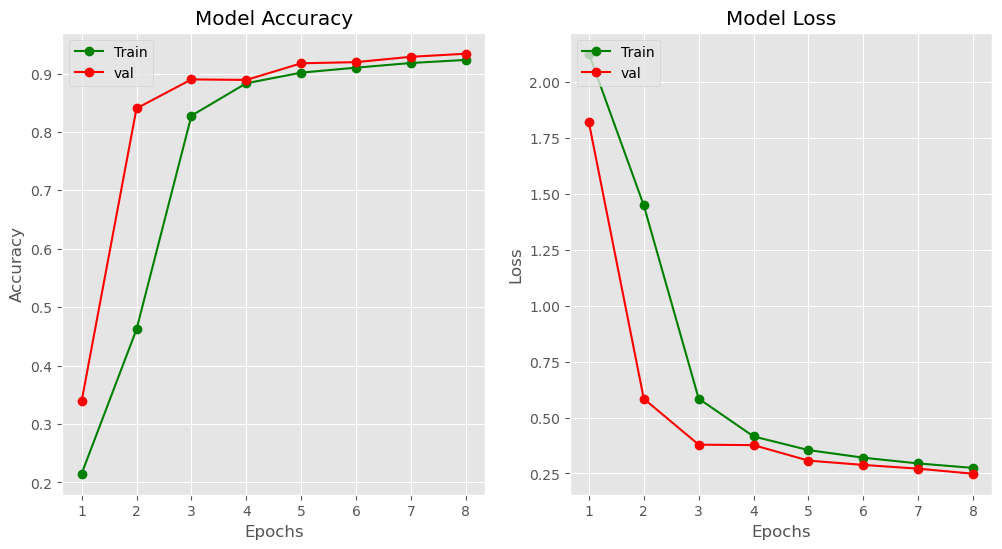

814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


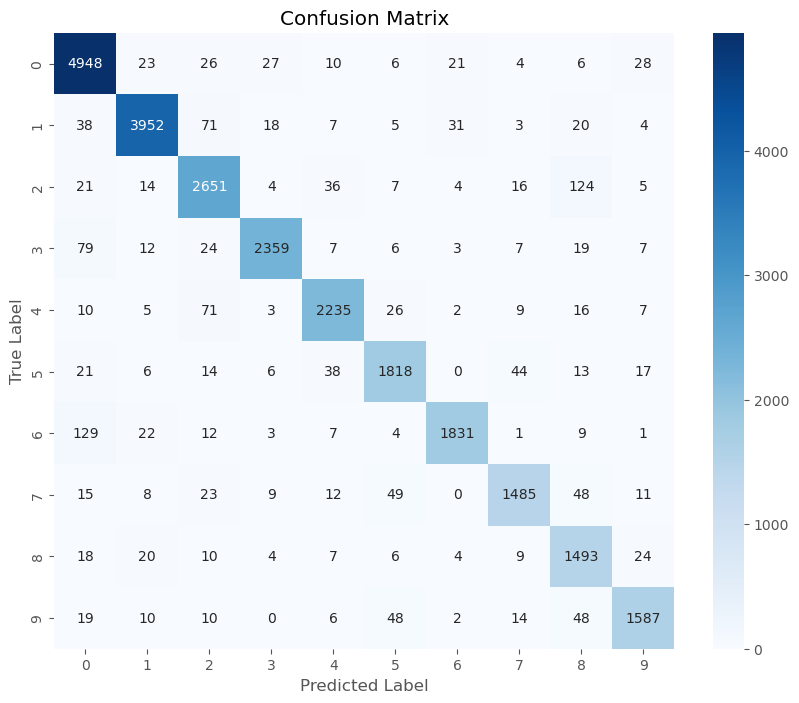

In [4]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,9)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

y_pred = CNN.predict(test_images).argmax(axis=1)
y_true = test_labels.argmax(axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
 
# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()